In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpolate

def lorenz(state, t, sigma=10., beta=8./3, rho=28.0):
    x, y, z = state
    """Compute the time-derivative of a Lorenz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [2]:
x0 = [1, 1, 1]  # starting vector
t = np.arange(0, 40, 0.01)
xt = integrate.odeint(lorenz, x0, t)

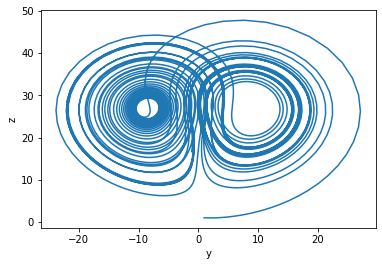

In [3]:
plt.plot(xt[:, 1], xt[:, 2])
plt.xlabel("y")
plt.ylabel("z")
plt.show()

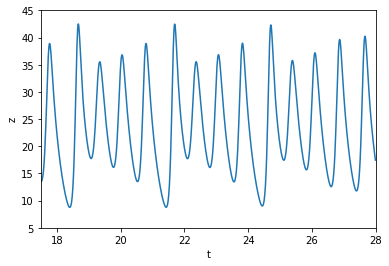

In [4]:
start = 1750
end = 2800
plt.plot(t[start:end], xt[start:end, 2])
plt.axis([t[start], t[end], 5, 45])
plt.xlabel("t")
plt.ylabel("z")
plt.show()

In [5]:
z0 = [1, 1, 1]  # starting vector
t = np.arange(0, 500, 0.01)  # one thousand time steps
zt = integrate.odeint(lorenz, x0, t)

z = zt[:,2]
max_z = [z for zp, z, zn in zip(z, z[1:], z[2:]) if zp < z and z > zn]

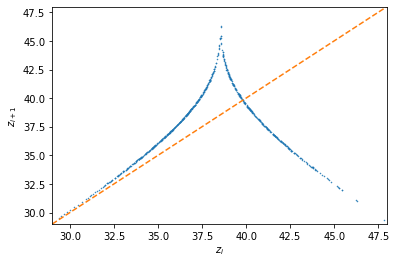

In [6]:
plt.plot(max_z[:-1], max_z[1:], 'o', ms=0.5)
plt.plot([29, 48], [29, 48], '--')
plt.axis([29, 48, 29, 48])
plt.xlabel("$z_{i}$")
plt.ylabel("$z_{i+1}$")
plt.show()

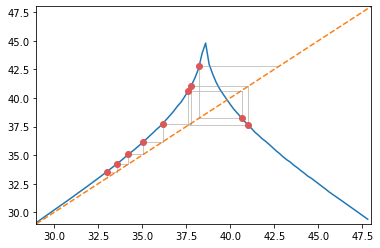

In [7]:
f = interpolate.interp1d(max_z[:-1], max_z[1:], 'slinear', fill_value='extrapolate')
x = np.arange(29, 48, 0.2)

plt.plot(x, f(x))
plt.plot([29, 48], [29, 48], '--')
plt.axis([29, 48, 29, 48])

iterations = 10
x_k = 33

for i in range(iterations):
    x_k1 = f(x_k)
    plt.plot([x_k, x_k],[x_k, x_k1], color="xkcd:grey", lw=0.5)
    plt.plot([x_k, x_k1], [x_k1, x_k1], color="xkcd:grey", lw=0.5)
    plt.plot(x_k, x_k1, 'o', color="xkcd:pastel red") 
    x_k = x_k1

plt.show()

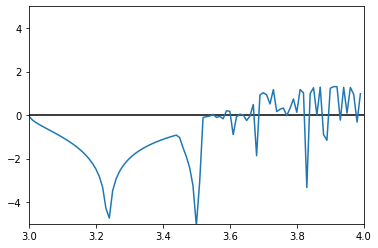

In [8]:
def approx_lyapunov_exponent(f, rand_interval, eps=1e-8, discard=300, iters=10000):
    a, b = rand_interval
    x = (b - a)*np.random.random() + a
    for i in range(discard):
        x = f(x)

    sum_log = 0
    for i in range(iters):
        df = 0.5 * (f(x + eps) - f(x - eps)) / eps
        sum_log += np.log(abs(df))
    
    return sum_log/iters

# Mapa del exponente de lyapunov para la ecuacion logistica

logistic = lambda x, r : r*x*(1-x)
r = np.arange(3, 4, 0.01)
plt.plot(r, approx_lyapunov_exponent(lambda x: logistic(x, r), [0, 1]))
plt.hlines(0, 3, 4)
plt.axis([3, 4, -5, 5])
plt.show()

In [9]:
# Exp de lyapunov aproximado de el mapa de lorenz
l = 0
for i in range(10):
    l += approx_lyapunov_exponent(f, [35, 45])
l/10


1.0382559165314975

In [10]:
from matplotlib import animation
%matplotlib qt

In [27]:
fig, ax = plt.subplots(1, 2)
ax[0].axis([0, 5, 5, 45])
#ax.set_xticks([])
ln,  = ax[0].plot([], [])
dot, = ax[0].plot([], [], 'ro')
def animate(i):
    if i > 450:
        shift = (i/100 - 4.5)
        ax[0].set_xbound([shift, 5 + shift])
        
    ln.set_data(t[:i], xt[:i, 2])
    dot.set_data(t[i], xt[i, 2])
    return ln, dot, 
ani = animation.FuncAnimation(fig, animate, range(4000), interval=1000/60)

plt.show()


In [14]:
fig, ax = plt.subplots()

plt.plot(xt[:, 1], xt[:, 2])
ln,  = ax.plot([], [], "ro")
ax.axis([-30, 30, 0, 50])
def animate(i):
    ln.set_data(xt[i, 1], xt[i, 2])
    return ln, 
ani = animation.FuncAnimation(fig, animate, range(4000), blit=True, interval=1000/60)
plt.show()